## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

model = build_mlp()

In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
from keras import optimizers

#optimizer = keras.optimizers.Adam(lr=0.001)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.8562 - accuracy: 0.3377 - val_loss: 1.8927 - val_accuracy: 0.3331
Epoch 2/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.6463 - accuracy: 0.4190 - val_loss: 1.6288 - val_accuracy: 0.4221
Epoch 3/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.5607 - accuracy: 0.4467 - val_loss: 1.7046 - val_accuracy: 0.3974
Epoch 4/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.5001 - accuracy: 0.4690 - val_loss: 1.5452 - val_accuracy: 0.4506
Epoch 5/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.4509 - accuracy: 0.4890 - val_loss: 1.5624 - val_accuracy: 0.4430
Epoch 6/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.4089 - accuracy: 0.5022 - val_loss: 1.4770 - val_accuracy: 0.4715
Epoch 7/500
50000/50000 [==============================] - 5s 

Epoch 56/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.3346 - accuracy: 0.8810 - val_loss: 2.1431 - val_accuracy: 0.5361
Epoch 57/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.3146 - accuracy: 0.8910 - val_loss: 2.3094 - val_accuracy: 0.5169
Epoch 58/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.3050 - accuracy: 0.8921 - val_loss: 2.2842 - val_accuracy: 0.5288
Epoch 59/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.3232 - accuracy: 0.8874 - val_loss: 2.3591 - val_accuracy: 0.5118
Epoch 60/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.2987 - accuracy: 0.8932 - val_loss: 2.4677 - val_accuracy: 0.5147
Epoch 61/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.2875 - accuracy: 0.8980 - val_loss: 2.3740 - val_accuracy: 0.5179
Epoch 62/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.2750 - accuracy: 0.9028

Epoch 111/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0802 - accuracy: 0.9718 - val_loss: 3.8268 - val_accuracy: 0.5238
Epoch 112/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1267 - accuracy: 0.9559 - val_loss: 3.8717 - val_accuracy: 0.5180
Epoch 113/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1133 - accuracy: 0.9603 - val_loss: 3.8937 - val_accuracy: 0.5280
Epoch 114/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1199 - accuracy: 0.9583 - val_loss: 3.7546 - val_accuracy: 0.5369
Epoch 115/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.1060 - accuracy: 0.9625 - val_loss: 3.8271 - val_accuracy: 0.5315
Epoch 116/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0785 - accuracy: 0.9730 - val_loss: 3.8842 - val_accuracy: 0.5366
Epoch 117/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0826 - accuracy:

50000/50000 [==============================] - 4s 88us/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 4.7443 - val_accuracy: 0.5538
Epoch 166/500
50000/50000 [==============================] - 4s 88us/step - loss: 5.7720e-04 - accuracy: 1.0000 - val_loss: 4.7845 - val_accuracy: 0.5548
Epoch 167/500
50000/50000 [==============================] - 4s 88us/step - loss: 7.1427e-04 - accuracy: 1.0000 - val_loss: 4.7979 - val_accuracy: 0.5543
Epoch 168/500
50000/50000 [==============================] - 4s 87us/step - loss: 4.9443e-04 - accuracy: 1.0000 - val_loss: 4.8120 - val_accuracy: 0.5543
Epoch 169/500
50000/50000 [==============================] - 4s 88us/step - loss: 4.6369e-04 - accuracy: 1.0000 - val_loss: 4.8269 - val_accuracy: 0.5530
Epoch 170/500
50000/50000 [==============================] - 4s 88us/step - loss: 4.3629e-04 - accuracy: 1.0000 - val_loss: 4.8346 - val_accuracy: 0.5545
Epoch 171/500
50000/50000 [==============================] - 4s 88us/step - loss: 4.3216e-04 -

50000/50000 [==============================] - 4s 88us/step - loss: 2.0710e-04 - accuracy: 1.0000 - val_loss: 5.0487 - val_accuracy: 0.5571
Epoch 219/500
50000/50000 [==============================] - 4s 88us/step - loss: 2.0655e-04 - accuracy: 1.0000 - val_loss: 5.0475 - val_accuracy: 0.5578
Epoch 220/500
50000/50000 [==============================] - 4s 88us/step - loss: 2.0203e-04 - accuracy: 1.0000 - val_loss: 5.0526 - val_accuracy: 0.5568
Epoch 221/500
50000/50000 [==============================] - 4s 88us/step - loss: 2.0218e-04 - accuracy: 1.0000 - val_loss: 5.0588 - val_accuracy: 0.5558
Epoch 222/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.9939e-04 - accuracy: 1.0000 - val_loss: 5.0578 - val_accuracy: 0.5561
Epoch 223/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.9843e-04 - accuracy: 1.0000 - val_loss: 5.0627 - val_accuracy: 0.5579
Epoch 224/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.9612e-

50000/50000 [==============================] - 4s 89us/step - loss: 1.4164e-04 - accuracy: 1.0000 - val_loss: 5.1696 - val_accuracy: 0.5568
Epoch 272/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.4063e-04 - accuracy: 1.0000 - val_loss: 5.1672 - val_accuracy: 0.5574
Epoch 273/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.4014e-04 - accuracy: 1.0000 - val_loss: 5.1723 - val_accuracy: 0.5581
Epoch 274/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3953e-04 - accuracy: 1.0000 - val_loss: 5.1738 - val_accuracy: 0.5570
Epoch 275/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3811e-04 - accuracy: 1.0000 - val_loss: 5.1754 - val_accuracy: 0.5576
Epoch 276/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3757e-04 - accuracy: 1.0000 - val_loss: 5.1765 - val_accuracy: 0.5581
Epoch 277/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3765e-

50000/50000 [==============================] - 4s 88us/step - loss: 1.0937e-04 - accuracy: 1.0000 - val_loss: 5.2526 - val_accuracy: 0.5563
Epoch 325/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0913e-04 - accuracy: 1.0000 - val_loss: 5.2528 - val_accuracy: 0.5573
Epoch 326/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0868e-04 - accuracy: 1.0000 - val_loss: 5.2575 - val_accuracy: 0.5583
Epoch 327/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0797e-04 - accuracy: 1.0000 - val_loss: 5.2555 - val_accuracy: 0.5568
Epoch 328/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0706e-04 - accuracy: 1.0000 - val_loss: 5.2581 - val_accuracy: 0.5578
Epoch 329/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0788e-04 - accuracy: 1.0000 - val_loss: 5.2579 - val_accuracy: 0.5583
Epoch 330/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0652e-

50000/50000 [==============================] - 4s 88us/step - loss: 8.9748e-05 - accuracy: 1.0000 - val_loss: 5.3193 - val_accuracy: 0.5568
Epoch 378/500
50000/50000 [==============================] - 4s 88us/step - loss: 8.9439e-05 - accuracy: 1.0000 - val_loss: 5.3197 - val_accuracy: 0.5574
Epoch 379/500
50000/50000 [==============================] - 4s 87us/step - loss: 8.9163e-05 - accuracy: 1.0000 - val_loss: 5.3226 - val_accuracy: 0.5569
Epoch 380/500
50000/50000 [==============================] - 4s 88us/step - loss: 8.8902e-05 - accuracy: 1.0000 - val_loss: 5.3237 - val_accuracy: 0.5572
Epoch 381/500
50000/50000 [==============================] - 4s 88us/step - loss: 8.8498e-05 - accuracy: 1.0000 - val_loss: 5.3225 - val_accuracy: 0.5571
Epoch 382/500
50000/50000 [==============================] - 4s 88us/step - loss: 8.8277e-05 - accuracy: 1.0000 - val_loss: 5.3255 - val_accuracy: 0.5572
Epoch 383/500
50000/50000 [==============================] - 4s 87us/step - loss: 8.7954e-

50000/50000 [==============================] - 4s 89us/step - loss: 7.6393e-05 - accuracy: 1.0000 - val_loss: 5.3745 - val_accuracy: 0.5571
Epoch 431/500
50000/50000 [==============================] - 5s 96us/step - loss: 7.6205e-05 - accuracy: 1.0000 - val_loss: 5.3778 - val_accuracy: 0.5571
Epoch 432/500
50000/50000 [==============================] - 4s 90us/step - loss: 7.5962e-05 - accuracy: 1.0000 - val_loss: 5.3770 - val_accuracy: 0.5574
Epoch 433/500
50000/50000 [==============================] - 4s 89us/step - loss: 7.5796e-05 - accuracy: 1.0000 - val_loss: 5.3775 - val_accuracy: 0.5571
Epoch 434/500
50000/50000 [==============================] - 5s 90us/step - loss: 7.5600e-05 - accuracy: 1.0000 - val_loss: 5.3793 - val_accuracy: 0.5570
Epoch 435/500
50000/50000 [==============================] - 5s 90us/step - loss: 7.5351e-05 - accuracy: 1.0000 - val_loss: 5.3805 - val_accuracy: 0.5569
Epoch 436/500
50000/50000 [==============================] - 5s 91us/step - loss: 7.5193e-

50000/50000 [==============================] - 4s 89us/step - loss: 6.6562e-05 - accuracy: 1.0000 - val_loss: 5.4258 - val_accuracy: 0.5575
Epoch 484/500
50000/50000 [==============================] - 4s 89us/step - loss: 6.6519e-05 - accuracy: 1.0000 - val_loss: 5.4250 - val_accuracy: 0.5571
Epoch 485/500
50000/50000 [==============================] - 4s 90us/step - loss: 6.6234e-05 - accuracy: 1.0000 - val_loss: 5.4255 - val_accuracy: 0.5572
Epoch 486/500
50000/50000 [==============================] - 4s 89us/step - loss: 6.6133e-05 - accuracy: 1.0000 - val_loss: 5.4270 - val_accuracy: 0.5570
Epoch 487/500
50000/50000 [==============================] - 4s 90us/step - loss: 6.5970e-05 - accuracy: 1.0000 - val_loss: 5.4282 - val_accuracy: 0.5576
Epoch 488/500
50000/50000 [==============================] - 4s 89us/step - loss: 6.5859e-05 - accuracy: 1.0000 - val_loss: 5.4290 - val_accuracy: 0.5572
Epoch 489/500
50000/50000 [==============================] - 4s 89us/step - loss: 6.5652e-

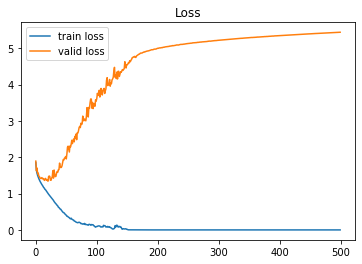

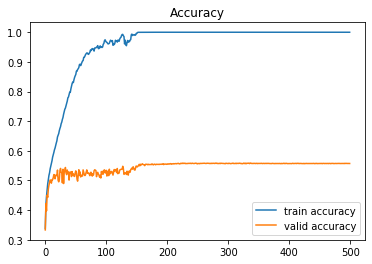

In [9]:
import matplotlib.pyplot as plt
# 以視覺化方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()